# Global Terrorism Database Analysis

## Introduction
The aim of this analysis is to provide answers to the following questions:

- How has the number of terrorist activities changed over the years?
- Are there certain regions where this trend is different from the global averages?
- How often the attack becomes a success?
- What are the most common methods of attacks? Does it differ in various regions or in time?

## Problem Statement
- Many terrorist attacks remain unattributed due to the absence of claims, delaying
effective counter measures.
- This project uses the Global Terrorism Database to build machine learning models
that predict the likely perpetrator group based on attack characteristics.
- By addressing challenges such as class imbalance and noisy data, the goal is to
support faster investigations, better resource allocation, and more effective
preventive strategies.

## About the dataset
The Dataset was extracted from the Global Terrorism Database (GTD) - an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks.

## Explanation of selected columns:
- success - Success of a terrorist strike
- suicide - 1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident was a suicide
- attacktype1 - The general method of attack
- attacktype1_txt - The general method of attack and broad class of tactics used.
- targtype1_txt - The general type of target/victim
- targsubtype1_txt - The more specific target category
- target1 - The specific person, building, installation that was targeted and/or victimized
- natlty1_txt - The nationality of the target that was attacked
- gname - The name of the group that carried out the attack
- gsubname - Additional details about group that carried out the attack like fractions
- nperps - The total number of terrorists participating in the incident
- weaptype1_txt - General type of weapon used in the incident
- weapsubtype1_txt - More specific value for most of the Weapon Types
- nkill - The number of total confirmed fatalities for the incident
- nkillus - The number of U.S. citizens who died as a result of the incidentkdjsa

In [2]:
# Importing Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Import Machine learning models using scikit-learn library
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Import required metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, f1_score

In [3]:
# import dataset
data1 = pd.read_csv('../gtd_data/globalterrorismdb_1.csv')
data2 = pd.read_csv('../gtd_data/globalterrorismdb_2021Jan-June_1222dist.csv')

In [4]:
# combining data from (1970-2017) + (2017 - 2021)
data = pd.concat([data1, data2], ignore_index=True)

In [5]:
# Data Shape
records = data.shape[0]
features = data.shape[1]

print('Total Number of recorded incidents: ', records)
print('Number of Features: ', features)

Total Number of recorded incidents:  214666
Number of Features:  135


In [6]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
# Features describing the incidents
print(data.columns.values)

['eventid' 'iyear' 'imonth' 'iday' 'approxdate' 'extended' 'resolution'
 'country' 'country_txt' 'region' 'region_txt' 'provstate' 'city'
 'latitude' 'longitude' 'specificity' 'vicinity' 'location' 'summary'
 'crit1' 'crit2' 'crit3' 'doubtterr' 'alternative' 'alternative_txt'
 'multiple' 'success' 'suicide' 'attacktype1' 'attacktype1_txt'
 'attacktype2' 'attacktype2_txt' 'attacktype3' 'attacktype3_txt'
 'targtype1' 'targtype1_txt' 'targsubtype1' 'targsubtype1_txt' 'corp1'
 'target1' 'natlty1' 'natlty1_txt' 'targtype2' 'targtype2_txt'
 'targsubtype2' 'targsubtype2_txt' 'corp2' 'target2' 'natlty2'
 'natlty2_txt' 'targtype3' 'targtype3_txt' 'targsubtype3'
 'targsubtype3_txt' 'corp3' 'target3' 'natlty3' 'natlty3_txt' 'gname'
 'gsubname' 'gname2' 'gsubname2' 'gname3' 'gsubname3' 'motive'
 'guncertain1' 'guncertain2' 'guncertain3' 'individual' 'nperps'
 'nperpcap' 'claimed' 'claimmode' 'claimmode_txt' 'claim2' 'claimmode2'
 'claimmode2_txt' 'claim3' 'claimmode3' 'claimmode3_txt' 'compclaim'


## Data Exploration

### 1. Number of Terrist Attacks per year

In [8]:
attacks_per_year = data['iyear'].value_counts().sort_index()

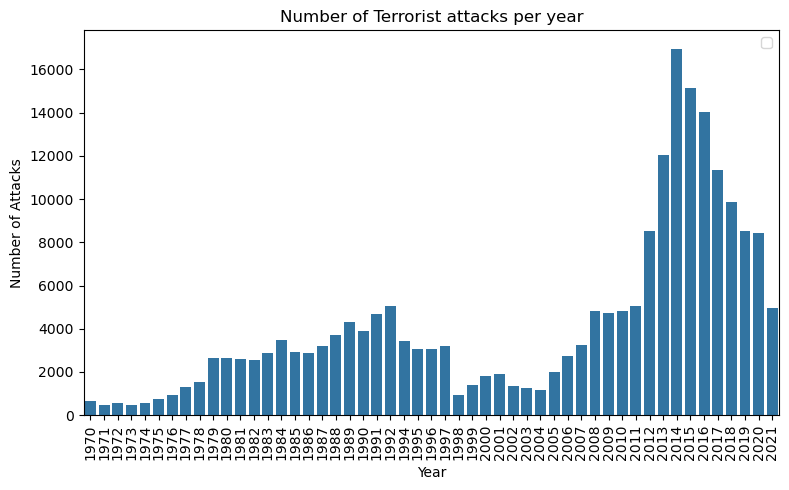

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data, x='iyear')
plt.title('Number of Terrorist attacks per year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.show()

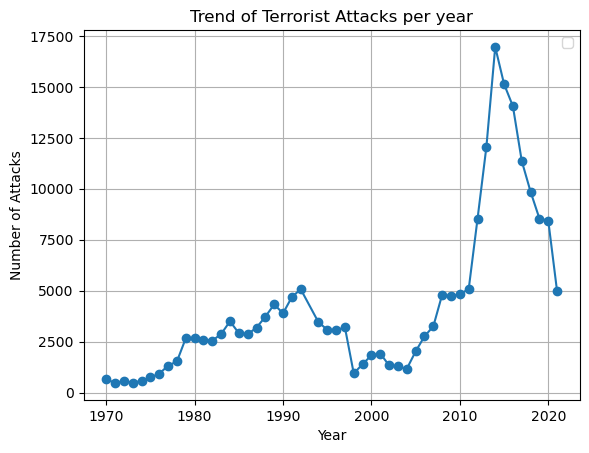

In [ ]:
# 2. Time series of Attacks every year since 1970
plt.Figure(figsize=(10, 6))
plt.plot(attacks_per_year.index, attacks_per_year.values, marker='o', linestyle='-')
plt.title('Trend of Terrorist Attacks per year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.legend()
plt.show()

In [11]:
# Inferece : We can clearly see that the number of Terrorist attacks have been increasing every year. 
# In 2014, maximum number of attacks were happened through out the world. 
# And after effective counter strategies they started reducing after 2014

### 3. Variety of Attack Types

In [12]:
attack_types = data['attacktype1_txt'].value_counts().sort_values(ascending=False)
attack_types.head()

attacktype1_txt
Bombing/Explosion                 99986
Armed Assault                     50845
Assassination                     21989
Hostage Taking (Kidnapping)       14493
Facility/Infrastructure Attack    12606
Name: count, dtype: int64

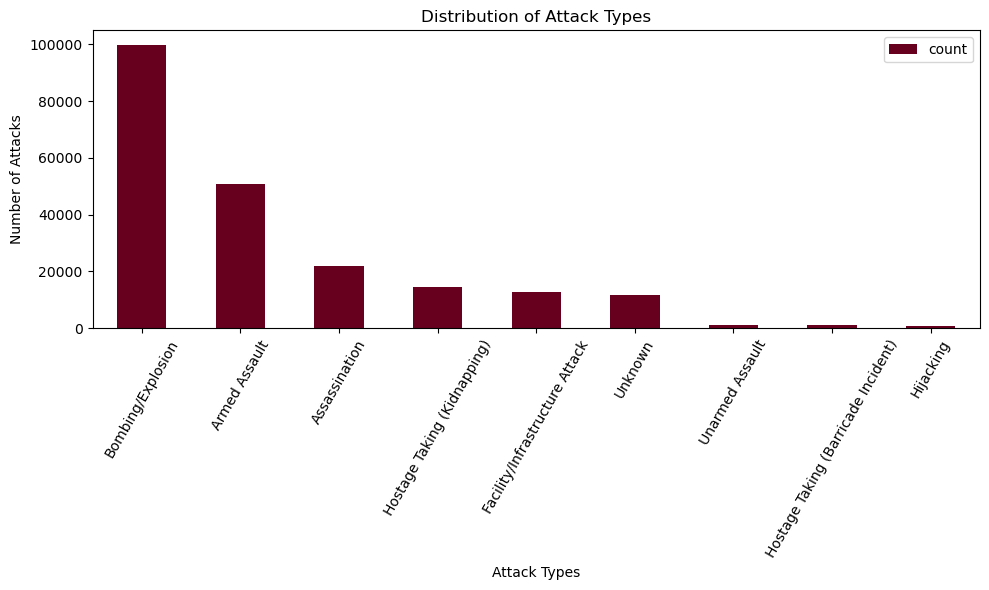

In [30]:
plt.figure(figsize=(10, 6))
attack_types.plot(kind='bar', colormap='RdBu')
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Types')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=60)
plt.tight_layout()
plt.legend()
plt.show()

### Number of Attacks by country

In [32]:
attacks_by_country = data['country_txt'].value_counts().sort_values(ascending=False)
attacks_by_country.head()

country_txt
Iraq           28068
Afghanistan    20373
Pakistan       15654
India          14164
Colombia        8991
Name: count, dtype: int64

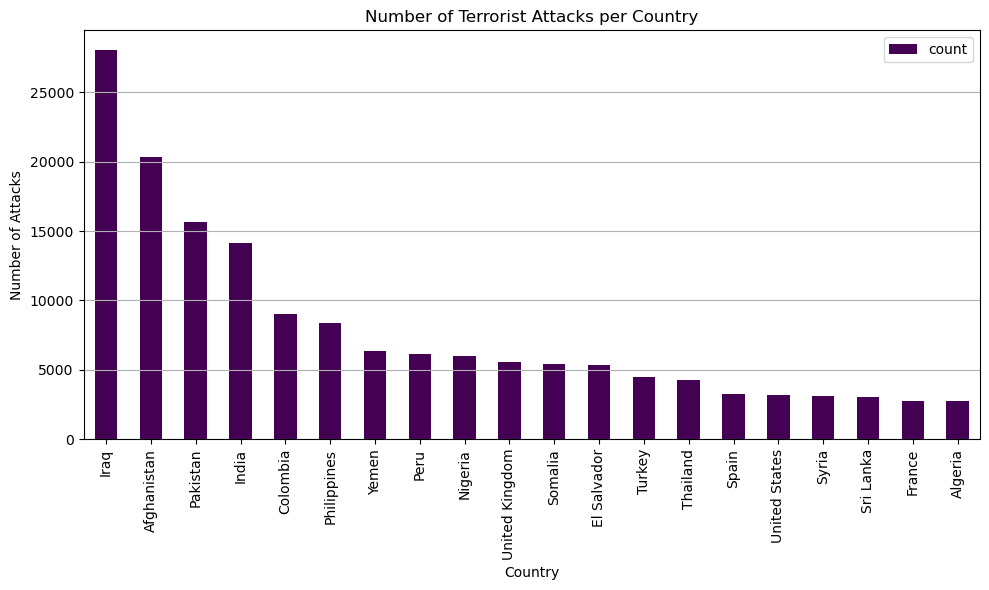

In [36]:
plt.figure(figsize=(10, 6))
attacks_by_country.head(20).plot(kind='bar', colormap='viridis')
plt.title('Number of Terrorist Attacks per Country')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.grid(axis='y')
plt.tight_layout()
plt.legend()
plt.show()

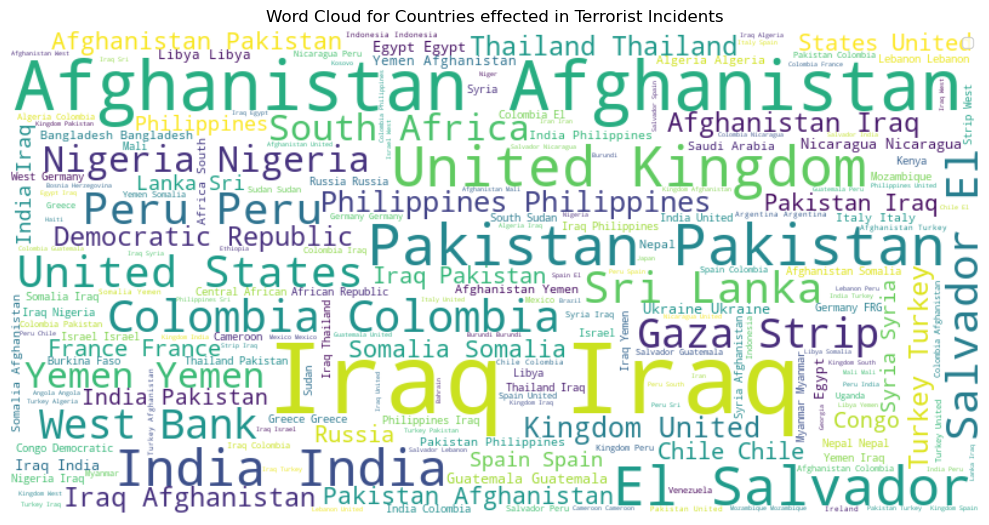

In [37]:
from wordcloud import WordCloud
countries_effected = data['country_txt'].dropna()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(countries_effected))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Countries effected in Terrorist Incidents')
plt.axis('off')
plt.tight_layout()
plt.legend()
plt.show()

### Number of casualities by country

In [40]:
casualties_per_year = data.groupby('iyear')['nkill'].count().sort_index()

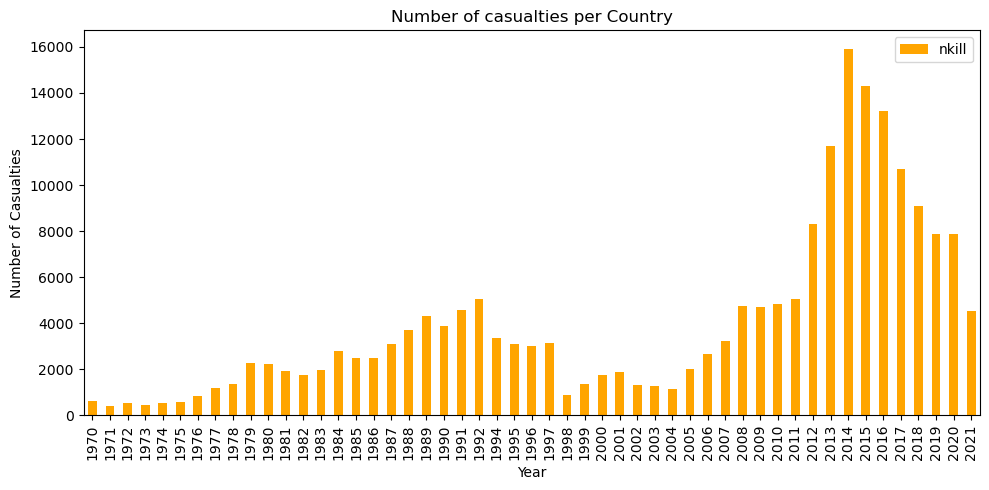

In [45]:
plt.figure(figsize=(10, 5))
casualties_per_year.plot(kind='bar', color='orange')
plt.title('Number of casualties per Country')
plt.xlabel('Year')
plt.ylabel('Number of Casualties')
plt.tight_layout()
plt.legend()
plt.show()

### Number of Casualties by target type

In [46]:
casualties_by_attackType = data.groupby('attacktype1_txt')['nkill'].sum().sort_values(ascending=False)
casualties_by_attackType

attacktype1_txt
Armed Assault                          186919.0
Bombing/Explosion                      176655.0
Unknown                                 50934.0
Hostage Taking (Kidnapping)             33694.0
Assassination                           28187.0
Hostage Taking (Barricade Incident)      5102.0
Facility/Infrastructure Attack           4664.0
Hijacking                                3782.0
Unarmed Assault                           956.0
Name: nkill, dtype: float64

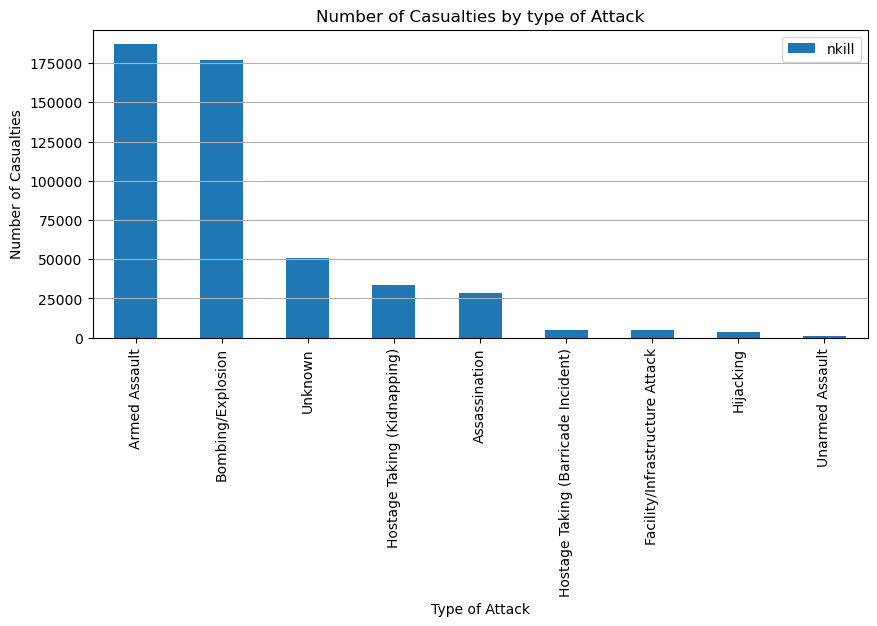

In [50]:
plt.figure(figsize=(10, 4))
casualties_by_attackType.plot(kind='bar')
plt.title('Number of Casualties by type of Attack')
plt.xlabel('Type of Attack')
plt.ylabel('Number of Casualties')
plt.grid(axis='y')
plt.legend()
plt.show()

### Top Terrorist groups by Casualties

In [51]:
top_terrorist_groups = data.groupby('gname')[['nkill', 'nwound']].sum().sort_values(by='nkill', ascending=False)
top_terrorist_groups

,nkill,nwound
gname,,
Unknown,122086.0,222785.0
Taliban,57650.0,47704.0
Islamic State of Iraq and the Levant (ISIL),43688.0,35182.0
Boko Haram,26339.0,12204.0
Al-Shabaab,12740.0,10215.0
...,...,...
Niger Delta Freedom Fighters (NDDF),0.0,0.0
Niger Delta Forest Army (NDFA),0.0,0.0
Cuban Secret Army,0.0,0.0


<Figure size 1000x600 with 0 Axes>

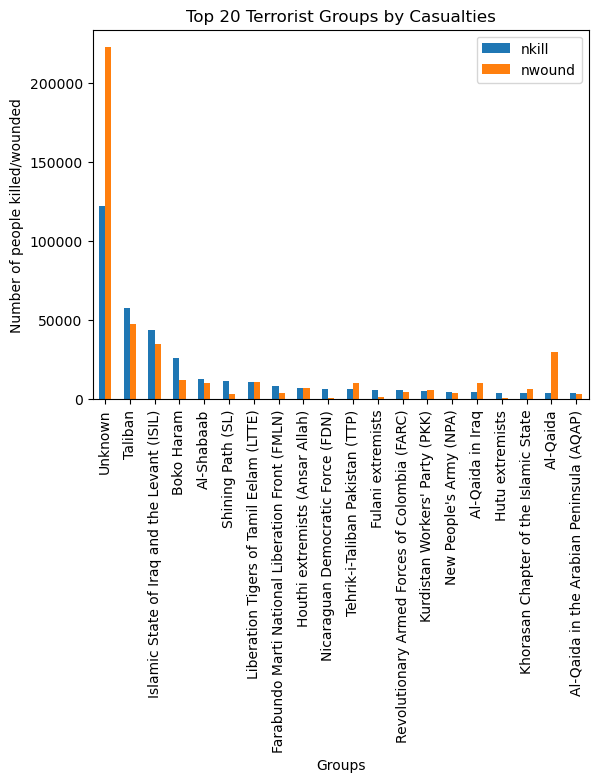

In [56]:
plt.figure(figsize=(10, 6))
top_terrorist_groups.head(20).plot(kind='bar')
plt.title('Top 20 Terrorist Groups by Casualties')
plt.xlabel('Groups')
plt.ylabel('Number of people killed/wounded')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Summarizing EDA

### 1. Top 5 Terrorist Groups (number of Attacks)

In [58]:
top_10_terrorist_groups = (data['gname'].value_counts(normalize=True)*100).sort_values(ascending=False)
top_10_terrorist_groups.head(10)

gname
Unknown                                             43.637558
Taliban                                              6.026106
Islamic State of Iraq and the Levant (ISIL)          3.484017
Shining Path (SL)                                    2.127491
Al-Shabaab                                           2.118174
Houthi extremists (Ansar Allah)                      1.637893
Boko Haram                                           1.611340
New People's Army (NPA)                              1.602955
Farabundo Marti National Liberation Front (FMLN)     1.561030
Irish Republican Army (IRA)                          1.243793
Name: proportion, dtype: float64

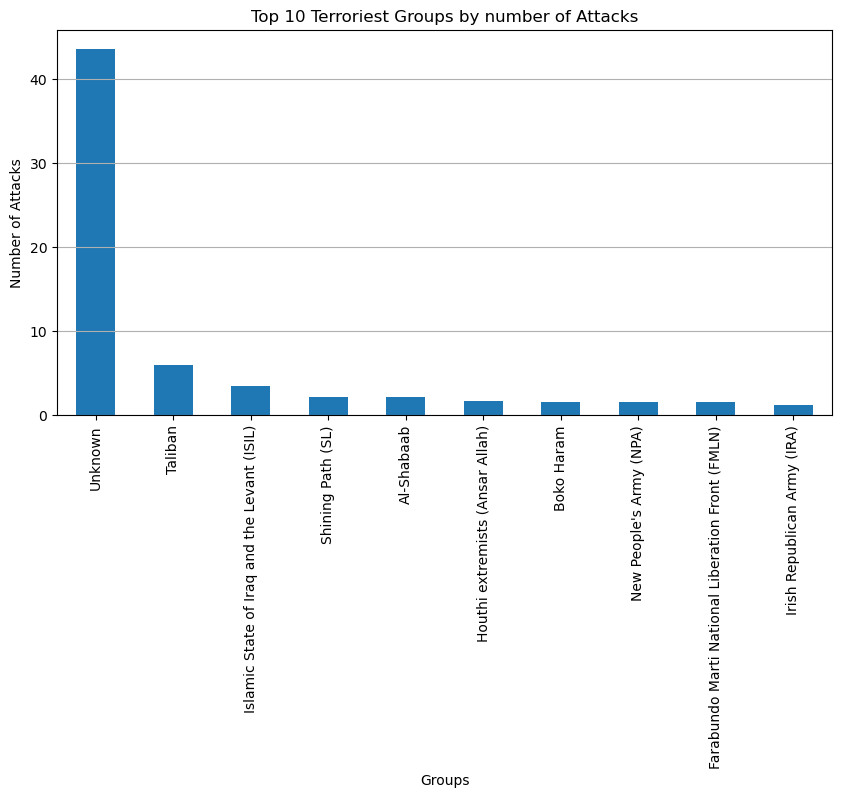

In [61]:
plt.figure(figsize=(10, 5))
top_10_terrorist_groups.head(10).plot(kind='bar')
plt.title('Top 10 Terroriest Groups by number of Attacks')
plt.xlabel('Groups')
plt.ylabel('Number of Attacks')
plt.grid(axis='y')
plt.show()

### Top 10 Countries most affected by Terrorist attacks

In [62]:
top_10_country = data['country_txt'].value_counts().head(10)
top_10_country

country_txt
Iraq              28068
Afghanistan       20373
Pakistan          15654
India             14164
Colombia           8991
Philippines        8375
Yemen              6317
Peru               6116
Nigeria            5998
United Kingdom     5553
Name: count, dtype: int64

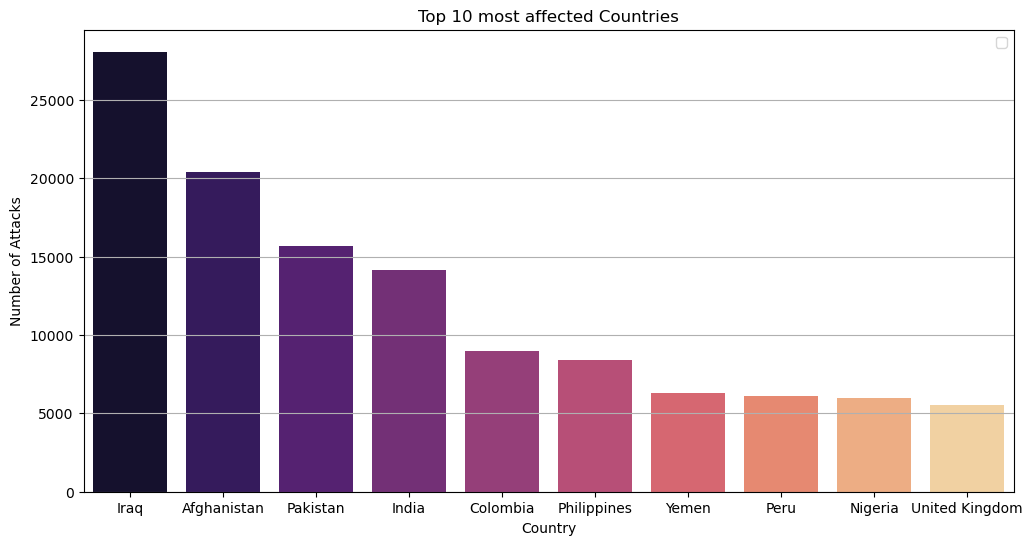

In [63]:
plt.figure(figsize=(12, 6))
sns.countplot(data, x='country_txt', order=top_10_country.index, palette='magma')
plt.title('Top 10 most affected Countries')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.grid(axis='y')
plt.legend()
plt.show()

### 3. Top 10 most common attack types

In [64]:
top_10_attack_types = data['attacktype1_txt'].value_counts().head(10)
top_10_attack_types

attacktype1_txt
Bombing/Explosion                      99986
Armed Assault                          50845
Assassination                          21989
Hostage Taking (Kidnapping)            14493
Facility/Infrastructure Attack         12606
Unknown                                11545
Unarmed Assault                         1257
Hostage Taking (Barricade Incident)     1172
Hijacking                                773
Name: count, dtype: int64

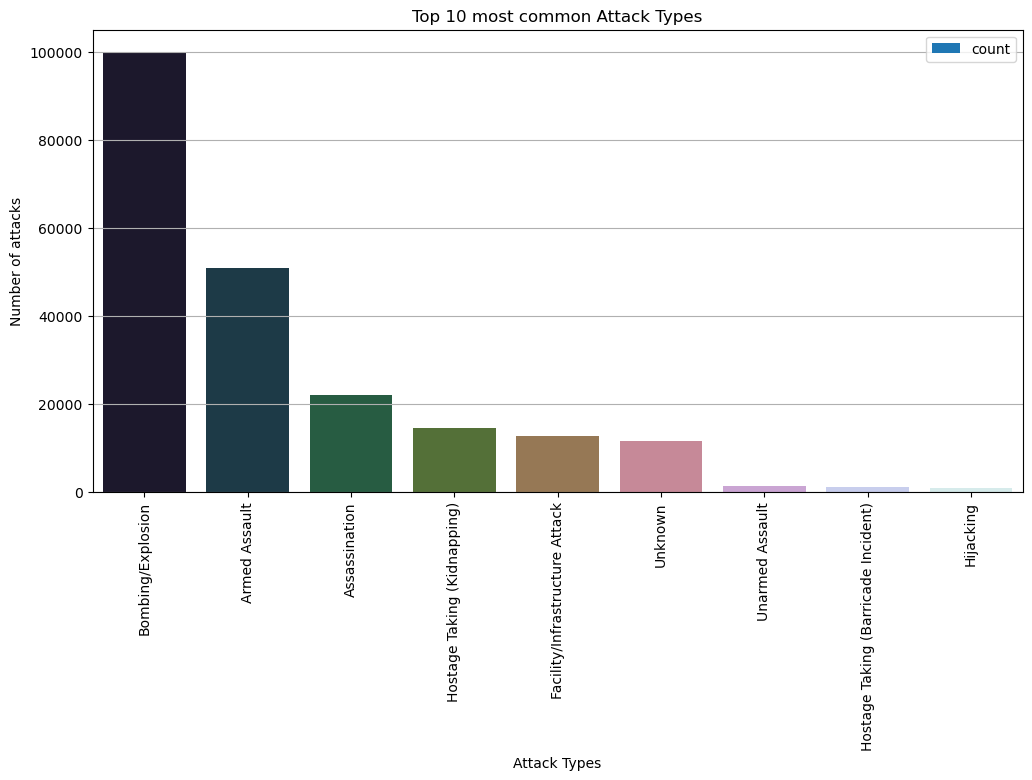

In [82]:
plt.figure(figsize=(12, 6))
top_10_attack_types.plot(kind='bar')
sns.countplot(data, x='attacktype1_txt', order=top_10_attack_types.index, palette='cubehelix')
plt.title('Top 10 most common Attack Types')
plt.xlabel('Attack Types')
plt.ylabel('Number of attacks')
plt.grid(axis='y')
plt.legend()
plt.show()

### 4. Top 10 most common target types

In [73]:
top_10_target_types = data['targtype1_txt'].value_counts().head(10)
top_10_target_types

targtype1_txt
Private Citizens & Property       53487
Military                          35292
Police                            29236
Government (General)              24355
Business                          22412
Unknown                            7351
Transportation                     7241
Utilities                          6424
Religious Figures/Institutions     5191
Educational Institution            4836
Name: count, dtype: int64

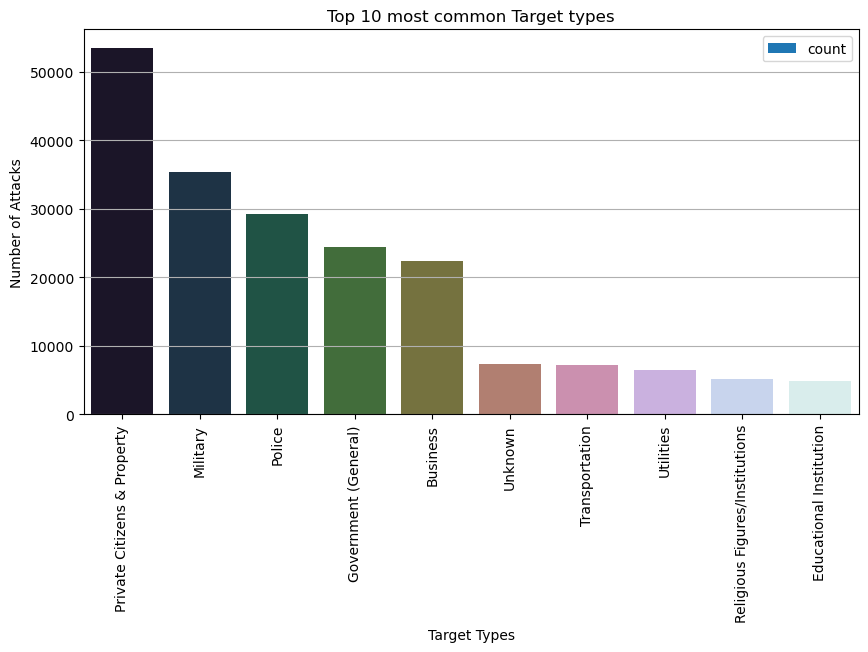

In [79]:
plt.figure(figsize=(10, 5))
top_10_target_types.plot(kind='bar')
sns.countplot(data, x='targtype1_txt', order=top_10_target_types.index, palette='cubehelix')
plt.title('Top 10 most common Target types')
plt.xlabel('Target Types')
plt.ylabel('Number of Attacks')
plt.grid(axis='y')
plt.legend()
plt.show()

### 5. Top most affected regions of the world

In [80]:
top_10_region = data['region_txt'].value_counts().head(10)
top_10_region

region_txt
Middle East & North Africa     59514
South Asia                     56578
Sub-Saharan Africa             24883
South America                  19993
Western Europe                 17433
Southeast Asia                 14871
Central America & Caribbean    10388
Eastern Europe                  5342
North America                   3906
East Asia                        852
Name: count, dtype: int64

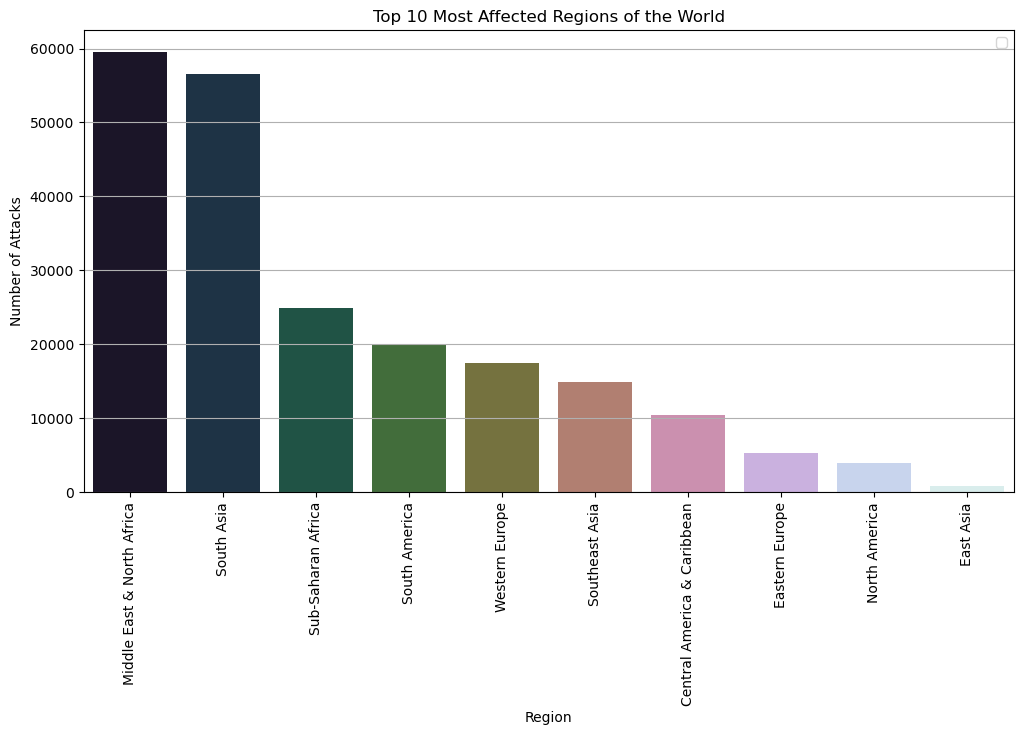

In [84]:
plt.figure(figsize=(12, 6))
sns.countplot(data, x='region_txt', order=top_10_region.index, palette='cubehelix')
plt.title('Top 10 Most Affected Regions of the World')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.legend()
plt.show()

In [88]:
top_groups = data[data['gname'] != 'Unknown']
top_groups['gname'].value_counts()

gname
Taliban                                              12936
Islamic State of Iraq and the Levant (ISIL)           7479
Shining Path (SL)                                     4567
Al-Shabaab                                            4547
Houthi extremists (Ansar Allah)                       3516
                                                     ...  
Dissident Military Mmbrs of Northern Tribal Group        1
War Veterans                                             1
Boz-Ok (Grey Arrow)                                      1
Revolutionary Bolivariano Movement 200                   1
Seven People Defense Force (SPDF)                        1
Name: count, Length: 3766, dtype: int64

In [90]:
known_data = data[data['gname'] != 'Unknown']
known_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN


In [94]:
top_known_groups = known_data['gname'].value_counts().head(10)
top_known_groups

gname
Taliban                                             12936
Islamic State of Iraq and the Levant (ISIL)          7479
Shining Path (SL)                                    4567
Al-Shabaab                                           4547
Houthi extremists (Ansar Allah)                      3516
Boko Haram                                           3459
New People's Army (NPA)                              3441
Farabundo Marti National Liberation Front (FMLN)     3351
Irish Republican Army (IRA)                          2670
Kurdistan Workers' Party (PKK)                       2612
Name: count, dtype: int64

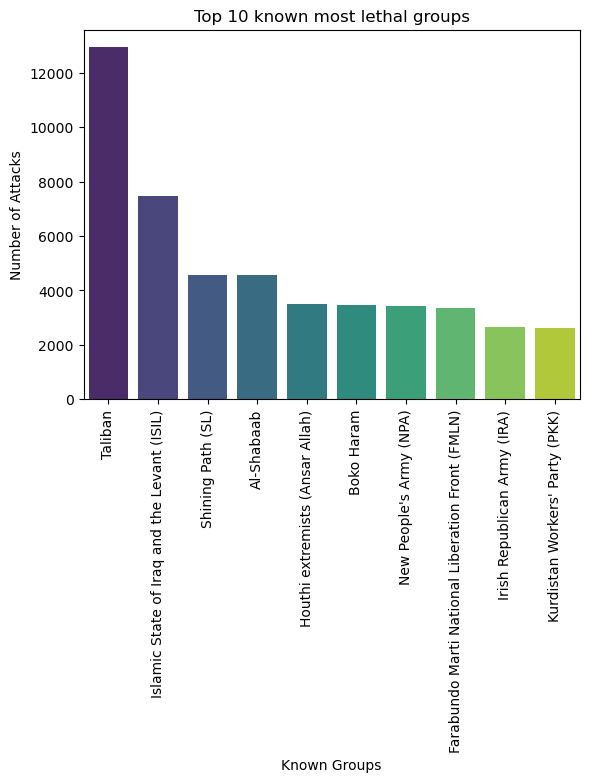

In [98]:
plt.Figure(figsize=(8, 6))
sns.countplot(known_data, x='gname', order=top_known_groups.index, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 10 known most lethal groups')
plt.xlabel('Known Groups')
plt.ylabel('Number of Attacks')
plt.show()